# NLP Project on Language Identification for four Ethiopian Languages

## Group Name _____&_____ID

1. Tibebesilasie Ashenafy _________________SGS/0475/2014A
2. Saba Sitotaw ___________________________SGS/0667/2014A
3. Sofonias Gashaw ________________________SGS/0474/2014A
4. Meron Dejene ___________________________SGS/0471/2014A

## First we import the required libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

## Then we load the data, count the language and visulaize the count 

In [2]:
Lang4NLP = pd.read_csv('Languages.csv')

In [3]:
Lang4NLP.tail()

Text     Language
1995   Hariiroon michummaa cimaa yookiin firummaa in...  Afaan Oromo
1996   fi  hanga fi jalatti tumaman keessaa tokko ra...  Afaan Oromo
1997   Keewwata Daangaa Mootummaa Biyya Alaa Cabsuu ...  Afaan Oromo
1998   Mallattoolee Biyya Alaa Beekamoo Salphisuu  N...  Afaan Oromo
1999   Buuura keewwata kana keewwata xiqqaa  yookiin...  Afaan Oromo

In [4]:
Lang4NLP.shape

(2000, 2)

In [5]:
Lang4NLP['Language'].value_counts()

Afaan Oromo    500
Somali         500
Wolayta        500
Sidama         500
Name: Language, dtype: int64

C:\Users\metasebia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Language', ylabel='count'>

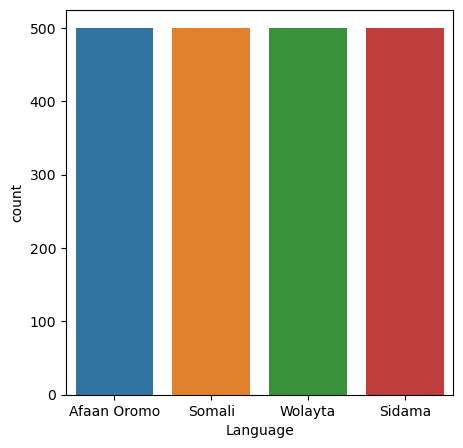

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(Lang4NLP['Language'])

#### If Sentence retrieve is needed

In [7]:
Lang4NLP['Text'][10]  # this will retrieve the 1oth sentence

'Rakkoo kanarraa kan ka?ee adabbii yakkamtoota irratti kennamu sirrii fi kan wal-fakkaatu gochuudhaaf /dhimmoota walfakkaatan irratti adabbii walfakkaata karaa itti murteessan mijeessuuf/ Manni Murtii Waliigalaa Federaalaa Qajeelfama Adabbii Itoophiyaa 1/2002 baasudhaan Caamsaa Bara 2002 irraa ka?ee hojiitti galamee jira.'

## Additional libraries & tools for preprocessing text

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import re

In [9]:
ps = PorterStemmer()
corpus=[]

for i in range(len(Lang4NLP['Text'])):
    rev = re.sub("^[a-zA-Z]", ' ', Lang4NLP['Text'][i])   # remove all characters except the alphabets
    rev = rev.lower()      # lower the alphabets
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if set(stopwords.words())] # remove the stopwords but in our case stopwords aren't available
    rev = ' '.join(rev)
    corpus.append(rev)
    
    print(f"{i}")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


### convert sentences into vectors

In [10]:
cv = CountVectorizer(binary=True)   # countvectorize based on frequency in this case we used binary=true so it doesnt use frequency
X = cv.fit_transform(corpus).toarray()  

In [11]:
X.shape

(2000, 13053)

### Converting language in to numbers: LabelEncoding

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y=label.fit_transform(Lang4NLP['Language'])

In [13]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
len(y)

2000

In [15]:
label.classes_

array(['Afaan Oromo', 'Sidama', 'Somali', 'Wolayta'], dtype=object)

### Creating new dataframe consisting preprocessed 'sentence' and target 'language'

In [16]:
NLP = pd.DataFrame(np.c_[corpus,y],columns=['Sentence','Language'])

In [17]:
NLP

Sentence Language
0     eerrii yakkaa meeshaa dudhaale hawaasa tokko (...        0
1     akkii yeroo kamiyyuu hawaasa keessatti uummamu...        0
2     ana taanaan akkaata murtiin adabbii ittiin mur...        0
3     awaasicha kan eeguu yakkii akka hin raawwatamn...        0
4     ama yakkoota muraasaatiin adabbiin hidhaa yook...        0
...                                                 ...      ...
1995  hariiroon michummaa cimaa yookiin firummaa inn...        0
1996  fi hanga fi jalatti tumaman keessaa tokko raaw...        0
1997  keewwata daangaa mootummaa biyya alaa cabsuu n...        0
1998  mallattoole biyya alaa beekamoo salphisuu namn...        0
1999  buuura keewwata kana keewwata xiqqaa yookiin t...        0

[2000 rows x 2 columns]

## Spliting into training & testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 13053), (400, 13053), (1600,), (400,))

## Defining the model

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
classifier = MultinomialNB().fit(X_train, y_train)

In [22]:
pred = classifier.predict(X_test)

In [23]:
pred

array([2, 1, 3, 3, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 3, 0, 2, 0, 1, 1, 0, 1,
       3, 1, 3, 1, 2, 3, 2, 0, 1, 3, 0, 0, 3, 2, 3, 2, 2, 3, 0, 1, 1, 0,
       1, 2, 2, 2, 0, 3, 1, 1, 0, 2, 2, 3, 2, 0, 3, 1, 3, 1, 3, 1, 0, 3,
       3, 1, 2, 2, 2, 3, 0, 0, 2, 1, 0, 2, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2,
       2, 2, 0, 3, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 3, 3, 1, 1, 3,
       2, 0, 3, 3, 1, 2, 0, 0, 3, 0, 3, 0, 3, 2, 1, 3, 3, 1, 3, 1, 3, 0,
       2, 2, 0, 2, 3, 1, 3, 2, 1, 3, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1,
       0, 3, 2, 3, 2, 1, 0, 0, 3, 1, 0, 3, 1, 0, 3, 3, 2, 1, 0, 2, 2, 0,
       3, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 3, 2, 0, 1, 3, 2, 2, 3, 1, 0, 2,
       1, 1, 3, 3, 2, 3, 1, 0, 1, 1, 2, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1, 3,
       2, 3, 3, 2, 2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 3, 3, 1, 2, 1, 2, 2,
       3, 3, 2, 1, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 0, 2, 1,
       2, 1, 1, 0, 1, 0, 2, 3, 3, 2, 2, 3, 3, 2, 0, 3, 1, 1, 1, 2, 3, 3,
       3, 3, 1, 0, 0, 1, 1, 2, 3, 2, 3, 3, 1, 3, 1,

In [24]:
y_test

array([2, 1, 3, 3, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 3, 0, 2, 0, 1, 1, 0, 1,
       3, 1, 3, 1, 2, 3, 2, 0, 1, 3, 0, 0, 3, 2, 3, 2, 2, 3, 0, 1, 1, 0,
       1, 2, 2, 2, 0, 3, 1, 1, 0, 2, 2, 3, 2, 0, 3, 1, 3, 1, 3, 1, 0, 3,
       3, 1, 2, 2, 2, 3, 0, 0, 2, 1, 0, 2, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2,
       2, 2, 0, 3, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 3, 3, 1, 1, 3,
       2, 0, 3, 3, 1, 2, 0, 0, 3, 0, 3, 0, 3, 2, 1, 3, 3, 1, 3, 1, 3, 0,
       2, 2, 0, 2, 3, 1, 3, 2, 1, 3, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1,
       0, 3, 2, 3, 2, 1, 0, 0, 3, 1, 0, 3, 1, 0, 3, 3, 2, 1, 0, 2, 2, 0,
       3, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 3, 2, 0, 1, 3, 2, 2, 3, 1, 0, 2,
       1, 1, 3, 3, 2, 3, 1, 0, 1, 1, 2, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1, 3,
       2, 3, 3, 2, 2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 3, 3, 1, 2, 1, 2, 2,
       3, 3, 2, 1, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 0, 2, 1,
       2, 1, 1, 0, 1, 0, 2, 3, 3, 2, 2, 3, 3, 2, 0, 3, 1, 1, 1, 2, 3, 3,
       3, 3, 1, 0, 0, 1, 1, 2, 3, 2, 3, 3, 1, 3, 1,

## Evaluating the model

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

1.0
[[106   0   0   0]
 [  0 103   0   0]
 [  0   0  96   0]
 [  0   0   0  95]]


In [ ]:
y_pred = dt_clf.predict(X_test)

#### Confusion matrix using seaborn

<AxesSubplot:>

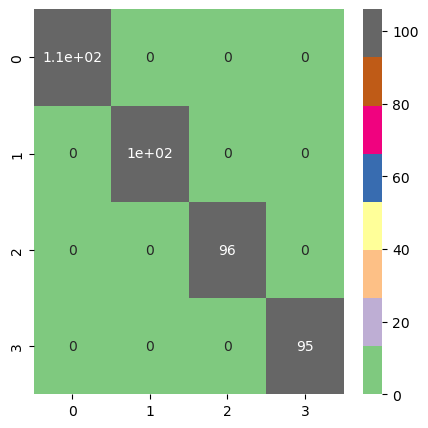

In [34]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, cmap=plt.cm.Accent)

In [37]:
labels = ['Afaan Oromo', 'Sidama', 'Somali', 'Wolayta']
# Confusion Matrix is often used to describe the performance of a classification model 
cm_Model_nb = metrics.confusion_matrix(y_test, pred)

In [39]:
# Calculate accuracy of the Decision Tree Model
accuracy_score_dt = accuracy_score(y_test,pred)

Text(0.5, 1.0, 'Naive Bayes Model Accuracy Score = 100.0%')

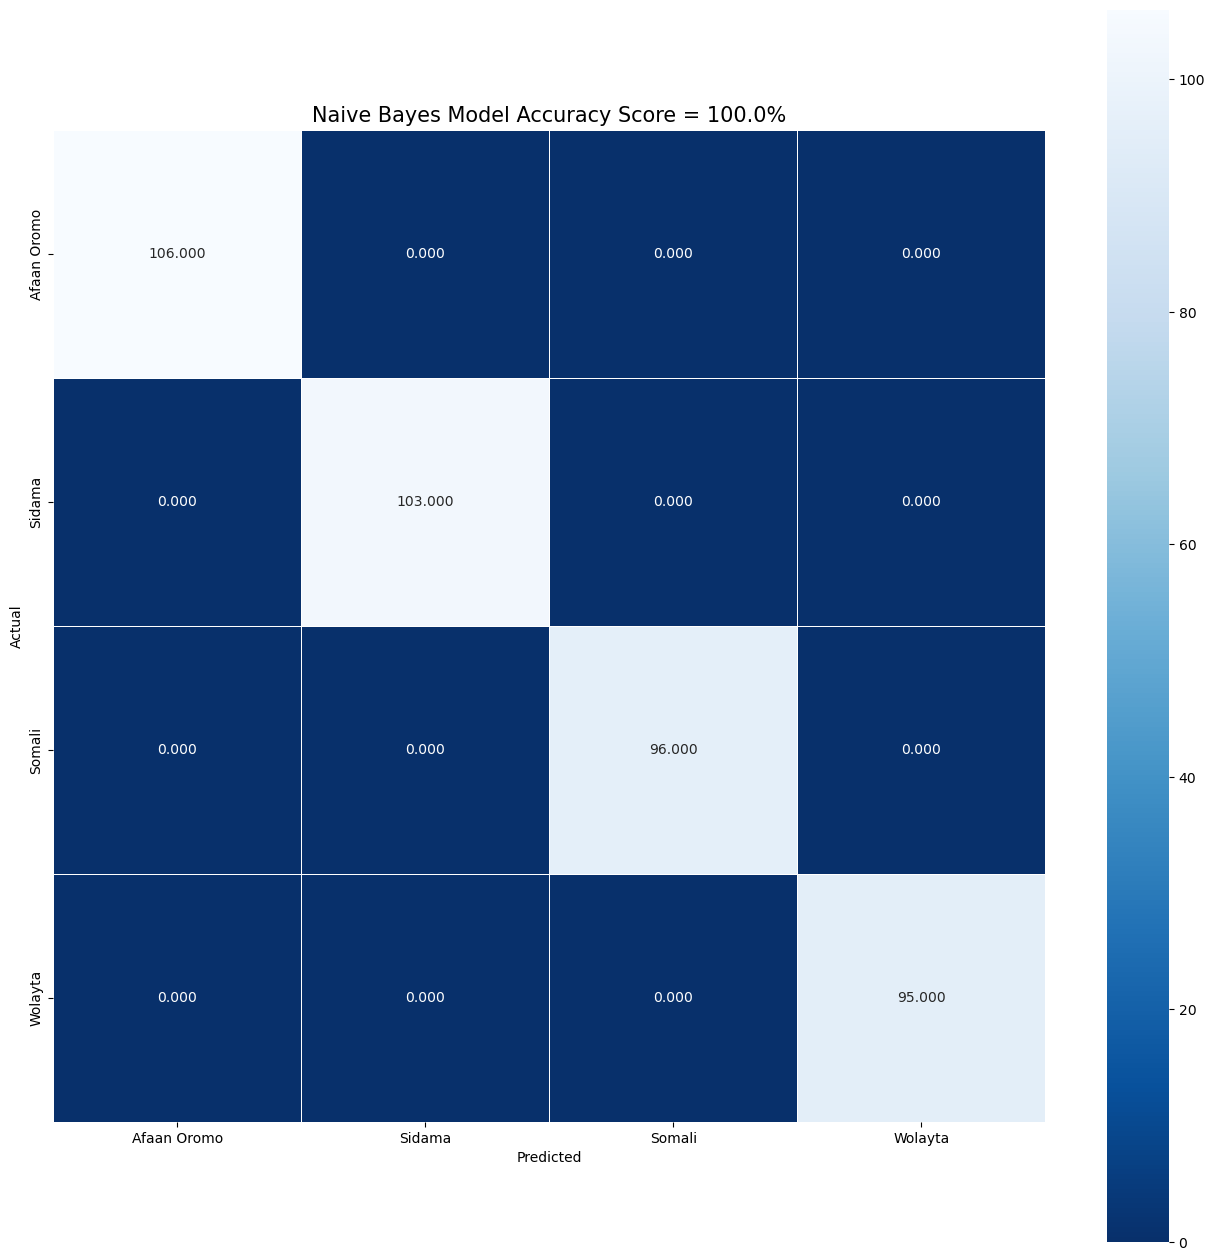

In [42]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_nb, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
title = 'Naive Bayes Model Accuracy Score = '+ str(round(accuracy_score_dt*100,2)) +"%"
plt.title(title, size = 15)

In [45]:
print('Decision Tree Model Output')
print(classification_report(y_test,pred))

Decision Tree Model Output
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        95

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



## Actual Lang & Predicted Lang

In [27]:
Final=pd.DataFrame(np.c_[y_test,pred],columns=['Actual', 'Predicted'])
Final

Actual  Predicted
0         2          2
1         1          1
2         3          3
3         1          1
4         3          3
..      ...        ...
395       1          1
396       2          2
397       0          0
398       3          3
399       2          2

[400 rows x 2 columns]

#### Saving the model

In [28]:
import joblib
joblib.dump(classifier, 'language_identification.sav')

['language_identification.sav']

#### Loading the model

In [29]:
model = joblib.load('language_identification.sav')

### Trying out the model (Test Model)

In [30]:
def model_TryOut(test_sentence):
    Languages={
        'Afaan Oromo' : 0,
        'Sidama' : 1,
        'Somali' : 2,
        'Wolayta' : 3,
    }
    
    rev = re.sub('^[a-zA-Z]', ' ', test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]
    rev = ' '.join(rev)
    
    rev = cv.transform([rev]).toarray()
    output = model.predict(rev)[0]
    
    keys = list(Languages)
    values = list(Languages.values())
    position = values.index(output)
    
    output = keys[position]
    print(output)

In [32]:
model_TryOut('Bilowgii Ilaah samada iyo dhulkuu abuuray') #somali

Somali


In [33]:
model_TryOut("1Maganu umo asse gordonna baatto kalaqino.") #sidama

Sidama


In [34]:
model_TryOut('2lafti bifa hin qabu, onaas ture; callabboo gad fagoo irra dukkanatu ture,') #Afaan oromo

Afaan Oromo


In [35]:
model_TryOut('Tammiya aginaa wurssettaappe doommin yelaga naati bantta heeran shiiqidi deriyaappe') #wolayta

Wolayta


#### For better understanding of the dataset

In [ ]:
pd.DataFrame(np.c_[data['Text'],data['Language'],y],columns=['Sentence','Language','Encoded'])